# Optimizations Algorithms

This notebook implements various Zero-order optimization algorithms - Random Search, Coordinate Search, and Coordinate Descent. There is also an implementation of Gradient Descent. 

Each of these implementations is accompanied by graphical visualizations that show the affect of various algorithms on the optimization of various functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("whitegrid")

## Function Definitions

In [2]:
# function definitions

def f1(x: np.ndarray):
    # x is a vector of dimension 2
    # x1**2 + x2**2 + 2
    return np.dot(x.T, x) + 2


def f2(x: np.ndarray) -> float:
    # vector x has x1 and x2
    # x1**2 + 24 x2**2
    return np.sum(x**2 * np.array([1, 24]))


def f3(x: np.ndarray) -> float:
    # vector x has x1 and x2
    # x1**2 + 120 * x2**2
    return np.sum(x**2 * np.array([1, 120]))


def f4(x: np.ndarray) -> float:
    # vector x has x1 and x2
    # x1**2 + 1200 * x2**2
    return np.sum(x**2 * np.array([1, 1200]))


def g1(x: np.ndarray) -> float:
    # x is in radians, 2pi = 360 degrees, pi/2 = 90 degrees
    # np.sin returns a scalar if x is a scalar
    return np.sin(x * 3)
    

def g2(x) -> float:
    # x is a scalar, but can also work with a vector
    return np.sin(x * 3) + (x**2 * 0.1)
    

def g3(x):
    # x is a vector, ndarray; or can be a scalar
    return x**2 + 0.2 # element-wise operation


def g4(x):
    return x**3


def g5(x):
    # return (np.power(x, 4) + x**2 + x*10) / 50
    return (x**4 + x**2 + x * 10) / 50
    
def g6(x):
    # m1 = np.power((x*3)-2.3, 3) + 1
    # print(m1)
    # p1 = (np.maximum(0, np.power((x*3)-2.3, 3) + 1))**2
    # print(p1)
    return (np.maximum(0, np.power((x*3)-2.3, 3) + 1))**2 + (np.maximum(0, np.power((x*(-3)) + 0.7, 3) + 1))**2

### Func tests

In [3]:
f1(np.array([2, 3])), f1(np.array([-5, -4]))

(15, 43)

In [4]:
f2(np.array([2, 3])) # 4 + 24 * 9 = 220

220

In [5]:
f2(np.array([3, 2])) # 9 + 24 * 4 = 105

105

In [6]:
f3(np.array([3, 2])) # 9 + 120 * 4 = 489

489

In [7]:
f4(np.array([3, 2])) # 9 + 1200 * 4 = 4809

4809

In [8]:
# pi = math.pi
pi = np.pi
g1(0), g1(pi/6), g1(pi/3), g1(pi/2), g1(2*pi/3)

(0.0, 1.0, 1.2246467991473532e-16, -1.0, -2.4492935982947064e-16)

In [9]:
g2(0), g2(pi/6)

(0.0, 1.0274155677808037)

In [10]:
g3(2), g3(3)

(4.2, 9.2)

In [11]:
g3(np.array(2)), g3(np.array(3)), g3(np.array([4, 5]))

(4.2, 9.2, array([16.2, 25.2]))

In [12]:
g4(2), g4(3)

(8, 27)

In [13]:
# min val for g5, at:
( ( ((2031**0.5) - 45)**(1/3) ) / 6**(2/3) ) - ( 1/( (6* ((2031**0.5)-45))**(1/3) ) )

-1.2347728250533112

In [14]:
g5(0), g5(1), g5(2), g5(-1.2), g5(-1.2347728250533112) # 1 -> 12/50=0.24; 2 -> 40/50=0.8

(0.0, 0.24, 0.8, -0.169728, -0.16996928446309353)

In [15]:
# ((-2.3)**3 + 1)**2 + (0.7**3 + 1)**2
# (0.7**3 + 1)**2
# 2.3/3
(-3 * (2.3/3) + 0.7)**3

-4.095999999999999

In [16]:
g6(0), g6(2.3/3), g6(0.5)

(1.8036489999999998, 1.0, 0.4762880000000002)

## Random Search

In [17]:
# random search function
def random_search(func_name, learning_rate: float, iteration_number: int, w: np.ndarray, descent_directions: int):
    weight_history = []
    cost_history = []
    alpha = learning_rate
    g = func_name
    
    # record initial weights and cost
    weight_history.append(w)
    cost_history.append(g(w))
    
    for k in range(iteration_number):       
        
        # obtain descent directions
        # print(f'k={k}')
        # print(f'w.size: {np.size(w)}')
        if np.size(w) == 2:
            # for two-variable functions
            directions_list = []
            while(len(directions_list) < 10*2):
                x1 = np.random.randn()
                if x1 > -1 and x1 < 1:
                    directions_list.append((x1, -1 * (1-x1**2)**0.5 ))
                    directions_list.append((x1, (1-x1**2)**0.5 ))
            directions = np.array(directions_list)
            # no need to perform norm since by definition x1^2 + (1-x^2) = 1
        else:
            directions = np.random.randn(descent_directions, np.size(w))
            norms = np.sqrt(np.sum(directions*directions, axis=1))[:, np.newaxis]
            directions = directions/norms
        
        ### Note: transpose
        # For a 1-D array, this returns an unchanged view of the original array, as a transposed vector is simply the same vector. 
        # To convert a 1-D array into a 2-D column vector, an additional dimension must be added, 
        # e.g., np.atleast2d(a).T achieves this, as does a[:, np.newaxis]
        
        ### determine best descent direction
        w_candidates = w + alpha*directions
        evals = np.array([g(w_val) for w_val in w_candidates])
        
        index = np.argmin(evals) # index that provides the lowest g(w_val)
        if g(w_candidates[index]) < g(w):
            d = directions[index, :]
            
            # take a step in the direction
            w = w + alpha * d
        else:
            # don't change weights, w
            # w = w # this step is not explicitly requried
            pass
        
        # record weights
        weight_history.append(w)
        cost_history.append(g(w))
        
    # end for
    return weight_history, cost_history


## 2D Plots

C:\conda\envs\e1\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


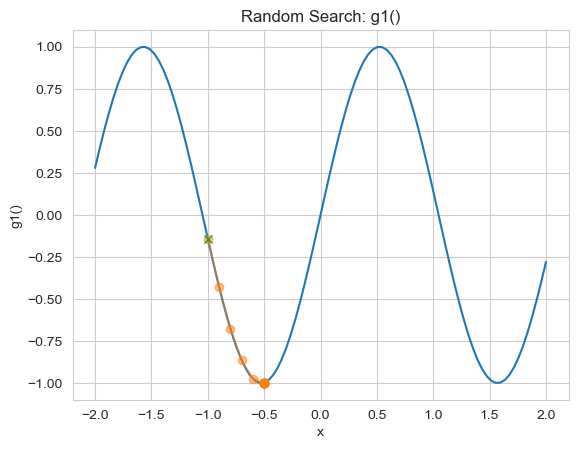

In [18]:
fun = g1
x = np.linspace(-2, 2, 100)
wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=-1, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

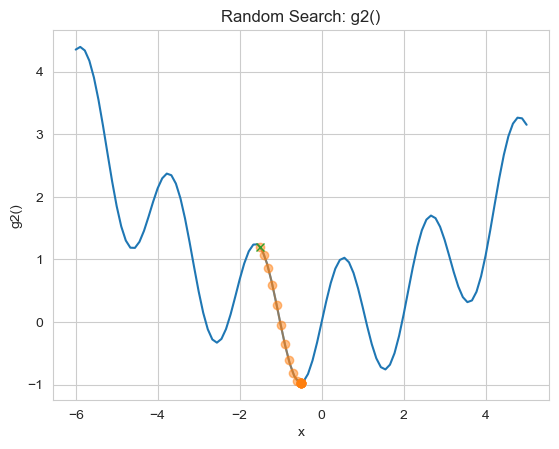

In [19]:
fun = g2
x = np.linspace(-6, 5, 100)
wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

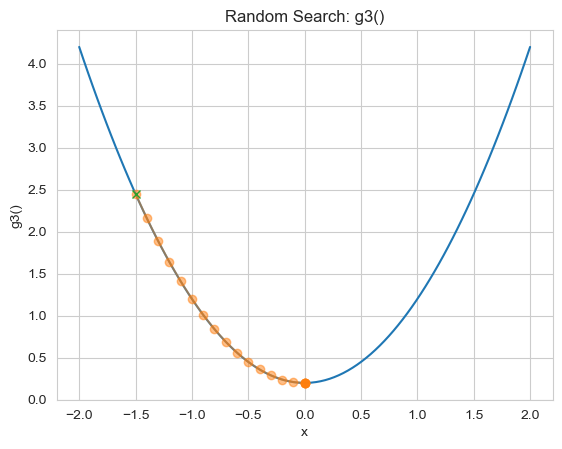

In [20]:
fun = g3
x = np.linspace(-2, 2, 100)
wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

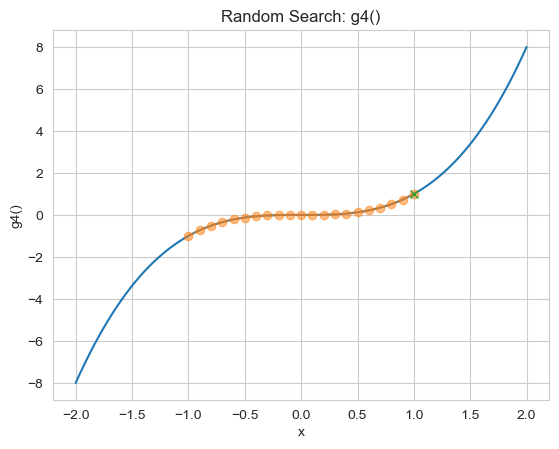

In [21]:
fun = g4
x = np.linspace(-2, 2, 100)
wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=1.0, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

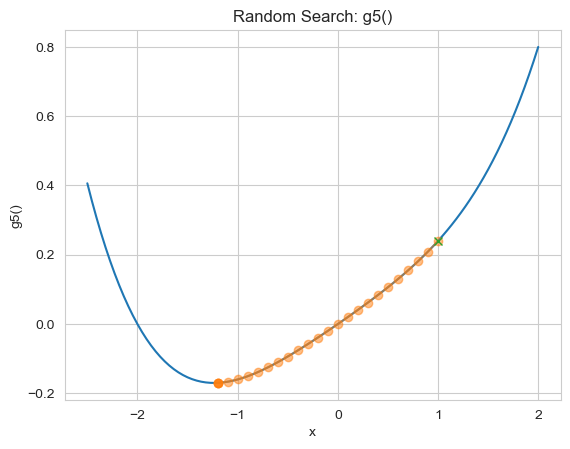

In [22]:
fun = g5
x = np.linspace(-2.5, 2, 100)
wh, ch = random_search(fun, learning_rate=0.1, iteration_number=25, w=1.0, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

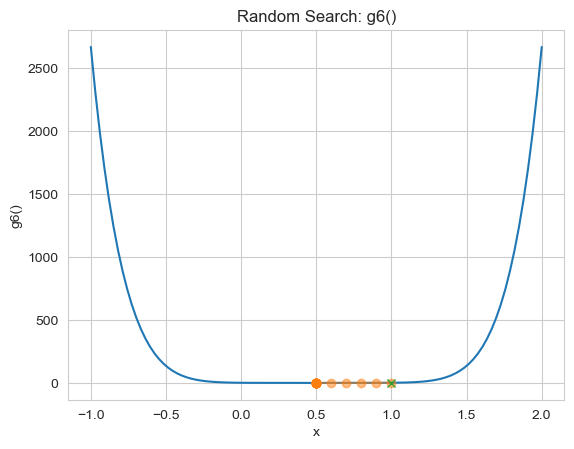

In [23]:
fun = g6
x = np.linspace(-1, 2, 100)
# x = np.linspace(0, 1.1, 100)

wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=1.0, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

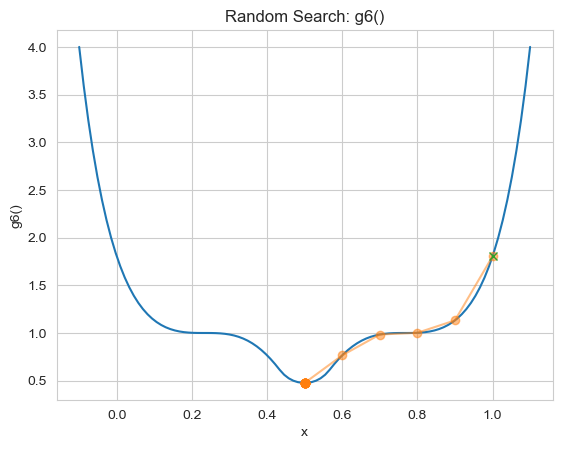

In [24]:
fun = g6
# x = np.linspace(-3, 4, 100)
x = np.linspace(-0.1, 1.1, 100)

wh, ch = random_search(fun, learning_rate=0.1, iteration_number=20, w=1.0, descent_directions=10*2)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')
plt.show()

## 3D Plots

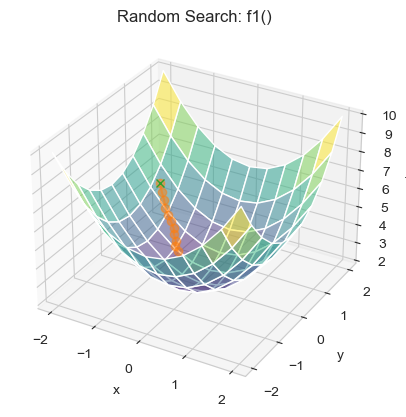

In [25]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.1, iteration_number=10, w=np.array([-1.5, 1.0]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()

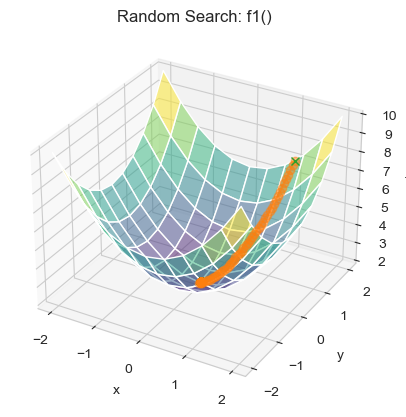

In [26]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.05, iteration_number=200, w=np.array([1.0, 2.0]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()

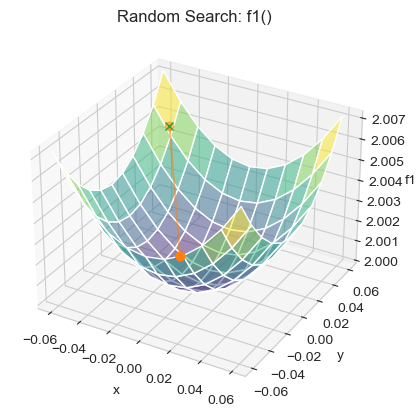

In [27]:
fun = f1

x = np.linspace(-0.06, 0.06, 11)
y = np.linspace(-0.06, 0.06, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.05, iteration_number=10, w=np.array([-0.05, 0.05]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()
# print(f'wh: {wh}\n')
# print(f'ch: {ch}')

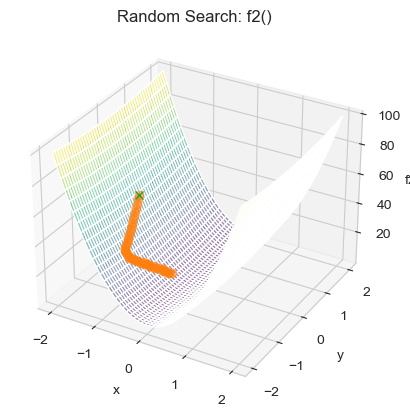

In [28]:
fun = f2

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.05, iteration_number=50, w=np.array([-2.0, 1.0]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()

Google: plot x^2 + 24 y^2

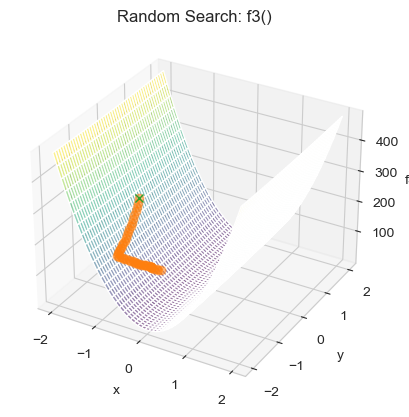

In [29]:
fun = f3

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.05, iteration_number=50, w=np.array([-2.0, 1.0]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()

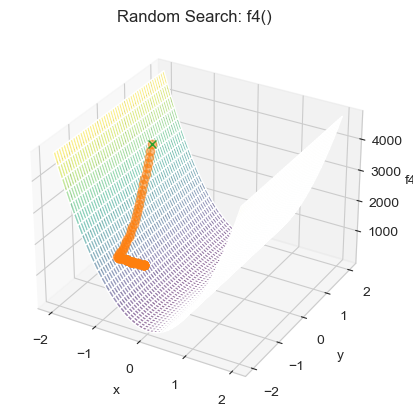

In [30]:
fun = f4

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = random_search(fun, learning_rate=0.05, iteration_number=100, w=np.array([-2.0, 1.5]), descent_directions=10*2)

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Random Search: ' + fun.__name__ + '()')

plt.show()

## Coordinate Search

In [31]:
# coordinate search function
def coordinate_search(func_name, learning_rate: float, iteration_number: int, w: np.ndarray):
    weight_history = []
    cost_history = []
    alpha = learning_rate
    g = func_name
    
    # record initial weights and cost
    weight_history.append(w)
    cost_history.append(g(w))
    
    # determine all the directions that needs to be examinied
    # print(f'w.size: {np.size(w)}')
    dir_plus = np.eye(np.size(w), np.size(w))
    dir_minus = -1 * np.eye(np.size(w), np.size(w))
    directions = np.concatenate((dir_plus, dir_minus), axis=0)
    # print(directions)
    # for w of size 2, the directions are
    # [[ 1.  0.]
    # [ 0.  1.]
    # [-1. -0.]
    # [-0. -1.]]
    
    for k in range(iteration_number):       
        # determine best descent direction
        w_candidates = w + alpha*directions
        evals = np.array([g(w_val) for w_val in w_candidates])
        
        index = np.argmin(evals) # index that provides the lowest g(w_val)
        if g(w_candidates[index]) < g(w):
            d = directions[index, :]
            
            # take a step in the direction
            w = w + alpha * d
            
            # record weights
            weight_history.append(w)
            cost_history.append(g(w))
        else:
            # exit the for loop
            break       
        
    # end for
    return weight_history, cost_history


### Try Coordinate Search with functions

In [32]:
wh, ch = coordinate_search(f1, learning_rate=0.1, iteration_number=20, w=np.array([-1.5, 1.0]))
print(f'wh: {wh}\n')
print(f'ch: {ch}')

wh: [array([-1.5,  1. ]), array([-1.4,  1. ]), array([-1.3,  1. ]), array([-1.2,  1. ]), array([-1.1,  1. ]), array([-1.,  1.]), array([-0.9,  1. ]), array([-0.9,  0.9]), array([-0.9,  0.8]), array([-0.8,  0.8]), array([-0.7,  0.8]), array([-0.7,  0.7]), array([-0.6,  0.7]), array([-0.6,  0.6]), array([-0.5,  0.6]), array([-0.5,  0.5]), array([-0.4,  0.5]), array([-0.4,  0.4]), array([-0.3,  0.4]), array([-0.3,  0.3]), array([-0.2,  0.3])]

ch: [5.25, 4.96, 4.6899999999999995, 4.4399999999999995, 4.209999999999999, 3.999999999999999, 3.8099999999999996, 3.619999999999999, 3.4499999999999993, 3.28, 3.13, 2.9799999999999995, 2.8499999999999996, 2.7199999999999998, 2.61, 2.5, 2.41, 2.32, 2.25, 2.18, 2.13]


In [33]:
wh, ch = coordinate_search(g3, learning_rate=0.1, iteration_number=20, w=-1)

In [34]:
wh

[-1,
 array([-0.9]),
 array([-0.8]),
 array([-0.7]),
 array([-0.6]),
 array([-0.5]),
 array([-0.4]),
 array([-0.3]),
 array([-0.2]),
 array([-0.1]),
 array([-1.38777878e-16])]

In [35]:
ch

[1.2,
 array([1.01]),
 array([0.84]),
 array([0.69]),
 array([0.56]),
 array([0.45]),
 array([0.36]),
 array([0.29]),
 array([0.24]),
 array([0.21]),
 array([0.2])]

## Coordinate Search 2D Plots

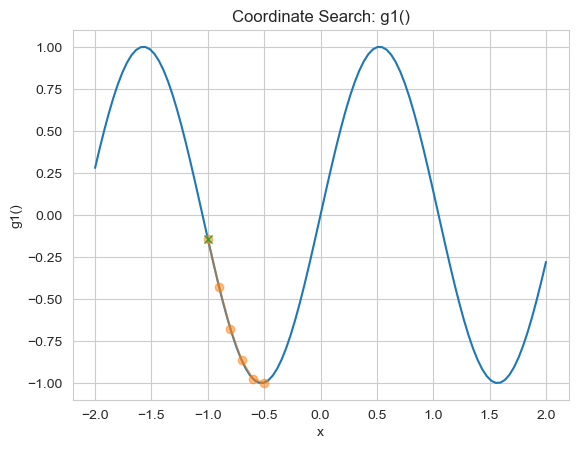

In [36]:
fun = g1
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=-1)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

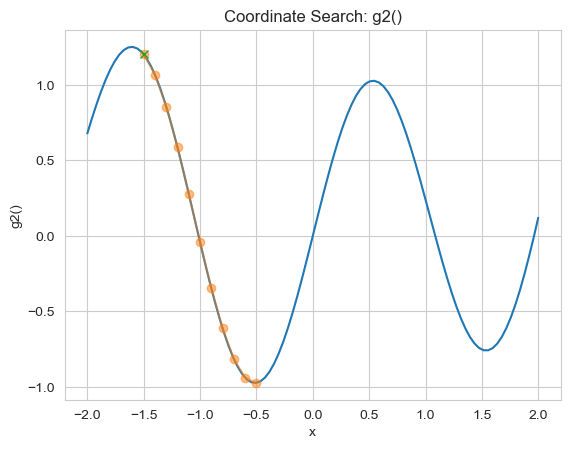

In [37]:
fun = g2
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

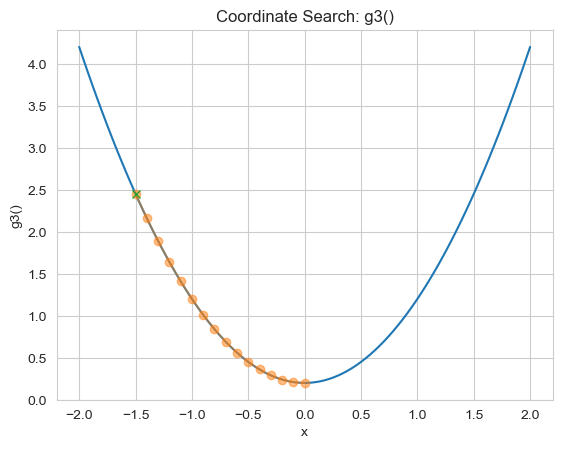

In [38]:
fun = g3
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

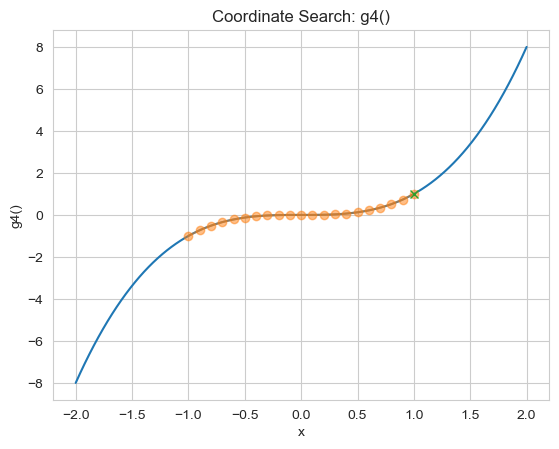

In [39]:
fun = g4
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

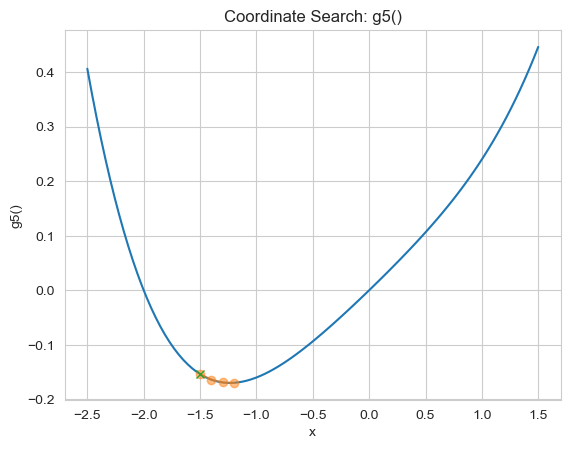

In [40]:
fun = g5
x = np.linspace(-2.5, 1.5, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

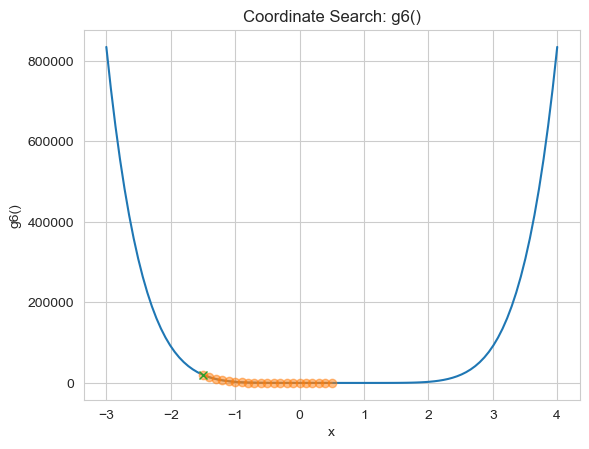

In [41]:
fun = g6
x = np.linspace(-3, 4, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

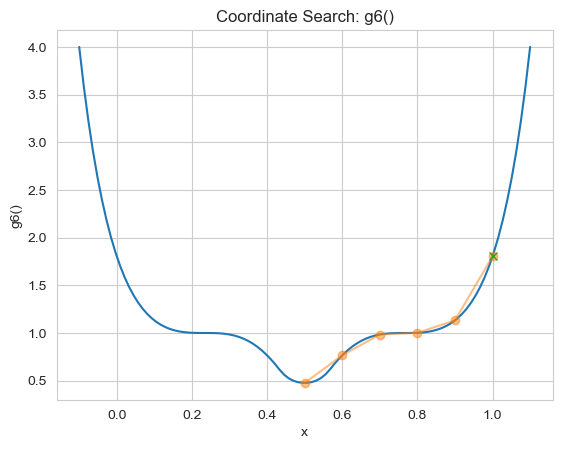

In [42]:
fun = g6
x = np.linspace(-0.1, 1.1, 100)
wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')
plt.show()

## Coordinate Search: 3D Plots

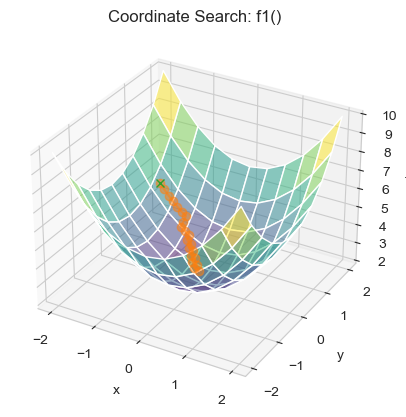

In [43]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_search(fun, learning_rate=0.1, iteration_number=20, w=np.array([-1.5, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')

plt.show()

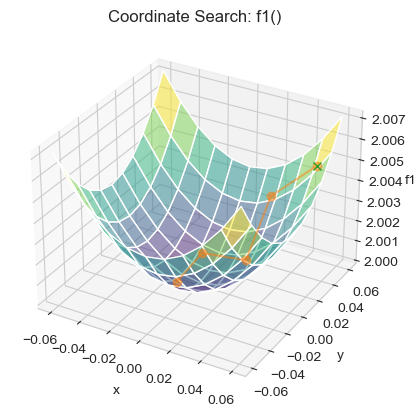

wh: [array([0.05, 0.05]), array([0.02, 0.05]), array([0.02, 0.02]), array([-0.01,  0.02]), array([-0.01, -0.01])]

ch: [2.005, 2.0029, 2.0008, 2.0005, 2.0002]


In [44]:
fun = f1

x = np.linspace(-0.06, 0.06, 11)
y = np.linspace(-0.06, 0.06, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_search(fun, learning_rate=0.03, iteration_number=200, w=np.array([0.049999999999999684, 0.049999999999998795]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')

plt.show()
print(f'wh: {wh}\n')
print(f'ch: {ch}')

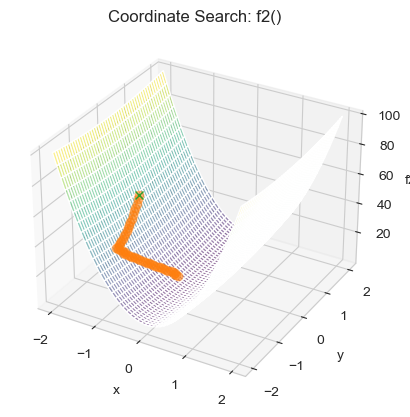

In [45]:
fun = f2

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_search(fun, learning_rate=0.05, iteration_number=50, w=np.array([-2.0, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')

plt.show()

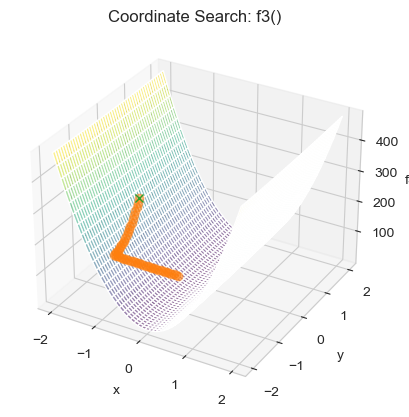

In [46]:
fun = f3

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_search(fun, learning_rate=0.05, iteration_number=50, w=np.array([-2.0, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')

plt.show()

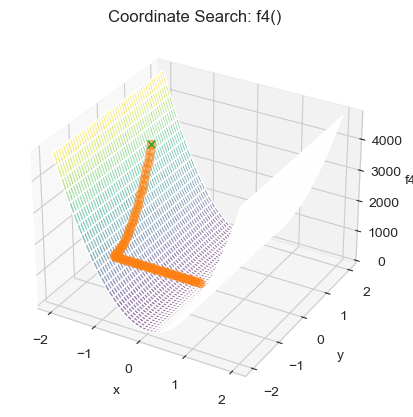

In [47]:
fun = f4

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_search(fun, learning_rate=0.05, iteration_number=100, w=np.array([-2.0, 1.5]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Search: ' + fun.__name__ + '()')

plt.show()

## Coordinate Descent

In [48]:
# coordinate descent function
def coordinate_descent(func_name, learning_rate: float, iteration_number: int, w: np.ndarray):
    weight_history = []
    cost_history = []
    alpha = learning_rate
    g = func_name
    N = np.size(w) # number of coordinates
    
    # record initial weights and cost
    weight_history.append(w)
    cost_history.append(g(w))
    
    for k in range(1, iteration_number+1):       
        c = np.random.permutation(N) # random shuffle of coordinates
        cost = g(w)
        
        # print(f'w.size: {np.size(w)}')
        
        if np.size(w) == 2:
            if k%2==1: # odd iteration
                direction = np.array([1.0, 0.0])
            else: # even direction
                direction = np.array([0.0, 1.0])
                
            # print(f'iter: {k}, direction: {direction}')
            
            # evaluate across the chosen direction
            evals = [g(w + alpha*direction)]
            evals.append(g(w - alpha*direction))
            evals = np.array(evals)

            index = np.argmin(evals)
            if evals[index] < cost:
                # take a step
                w = w + ((-1)**(index)) * alpha * direction
                cost = evals[index]
            # else no change in weights
            # wk = w (k-1)
            weight_history.append(w)
            cost_history.append(cost) 
            
            # initialy cost_history has only two items
            if len(cost_history) < 3:
                continue
            if cost_history[-2] < cost_history[-3]:
                continue
            else:
                break
        
        else: # for dims not equal to two
            for n in range(N): # loop over each coordinate direction

                direction = np.zeros((N, 1)).flatten()
                direction[c[n]] = 1

                # print(direction)

                # evaluate all possible candidates
                evals = [g(w + alpha*direction)]
                evals.append(g(w - alpha*direction))
                evals = np.array(evals)        

                index = np.argmin(evals) # index that provides the lowest g(w_val)

                if evals[index] < cost:
                    # take a step
                    w = w + ((-1)**(index)) * alpha * direction
                    cost = evals[index]

                    # record weights
                    weight_history.append(w)
                    cost_history.append(cost)
                else:
                    # exit the for loop
                    pass       
        
        # end for
    return weight_history, cost_history


In [49]:
# wh, ch = coordinate_descent(f1, learning_rate=0.2, iteration_number=20, w=np.array([-1.5, 1.0]))
# print(f'wh: {wh}\n')
# print(f'ch: {ch}')

## Coordinate Descent: 2D Plots

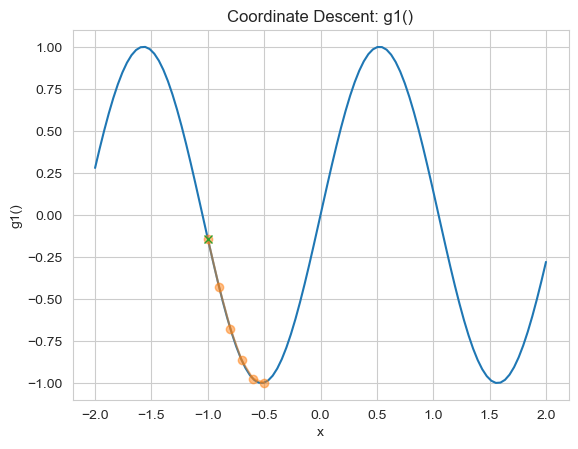

In [50]:
fun = g1
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=-1)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

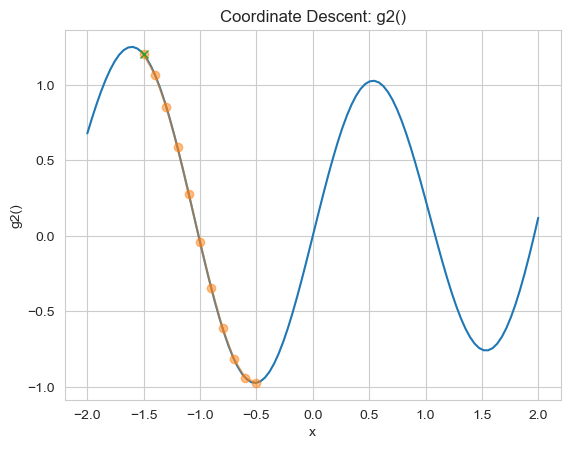

In [51]:
fun = g2
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

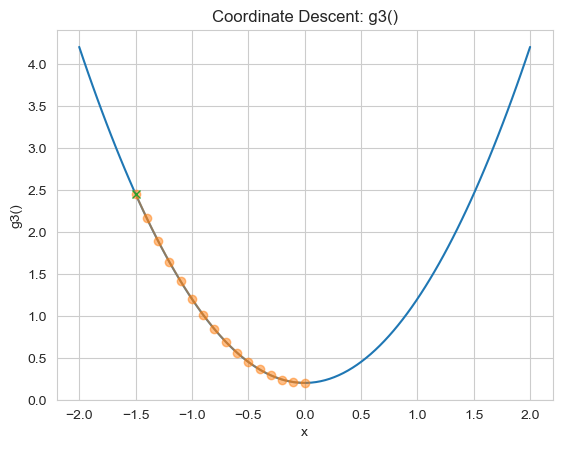

In [52]:
fun = g3
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

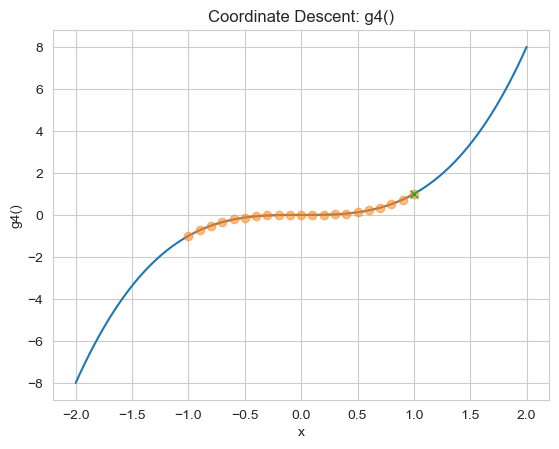

In [53]:
fun = g4
x = np.linspace(-2, 2, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

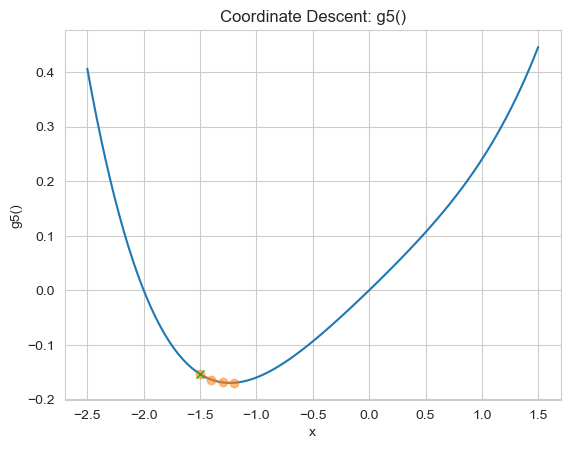

In [54]:
fun = g5
x = np.linspace(-2.5, 1.5, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

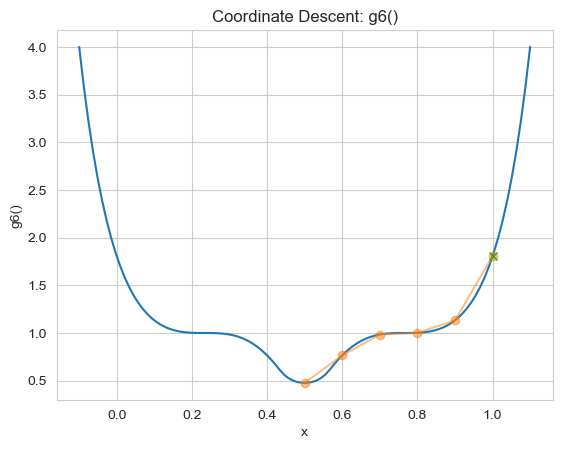

In [55]:
fun = g6
x = np.linspace(-0.1, 1.1, 100)
wh, ch = coordinate_descent(fun, learning_rate=0.1, iteration_number=20, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')
plt.show()

## Coordinate Descent: 3D Plots

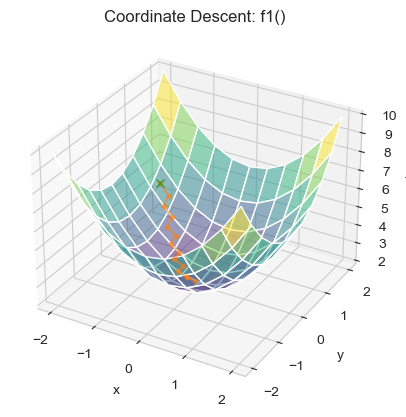

In [56]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_descent(fun, learning_rate=0.2, iteration_number=20, w=np.array([-1.5, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='.', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')

plt.show()

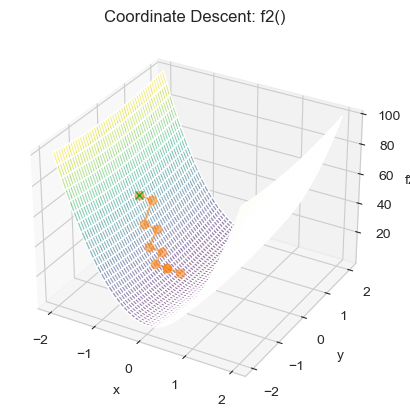

In [57]:
fun = f2

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_descent(fun, learning_rate=0.3, iteration_number=50, w=np.array([-2.0, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')

plt.show()

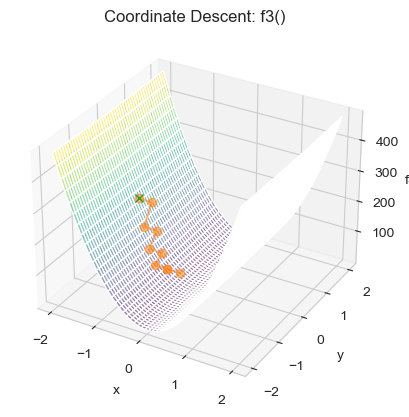

In [58]:
fun = f3

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_descent(fun, learning_rate=0.3, iteration_number=50, w=np.array([-2.0, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')

plt.show()

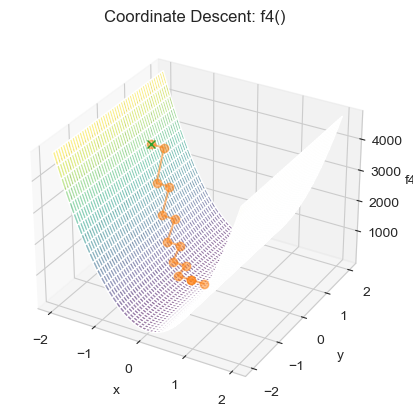

In [59]:
fun = f4

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = coordinate_descent(fun, learning_rate=0.3, iteration_number=100, w=np.array([-2.0, 1.5]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Coordinate Descent: ' + fun.__name__ + '()')

plt.show()

## Gradient Descent

In [60]:
import numdifftools as nd

def gradient_descent(func_name, learning_rate: float, iteration_number: int, w: np.ndarray):
    weight_history = []
    cost_history = []
    alpha = learning_rate
    g = func_name
    
    # record initial weights and cost
    weight_history.append(w)
    cost_history.append(g(w))
    
    # gradient function
    gradient_fn = nd.Gradient(g)
    
    for k in range(iteration_number):       
        grad_eval = gradient_fn(w)
        w = w - alpha * grad_eval # updated weights
        cost = g(w) # updated cost
        
        # record weights
        weight_history.append(w)
        cost_history.append(cost)
    # end for
    
    return weight_history, cost_history


In [61]:
def get_convergence_status(weight_history: list, cost_history: list) -> str:
    m = 5
    epsilon = 0.001
    
    converge = 1
    for idx in range(1, m+1):
        print(f'iter: {-idx}')
        w_k = weight_history[-idx]
        w_kminus1 = weight_history[-(idx+1)]
        c_k = cost_history[-idx]
        c_kminus1 = cost_history[-(idx+1)]
        
        euclidean_dist = np.linalg.norm(w_k - w_kminus1) # not, abs(w_k - w_kminus1) < epsilon
        if euclidean_dist < epsilon and abs(c_k - c_kminus1) < epsilon:
            continue
        else:
            converge = 0
    print(f'converge: {converge}')
    
    ret_str = ''
    if converge == 0:
        ret_str = 'no'
    else:
        if np.linalg.norm(weight_history[-1]) < 1e8 and abs(cost_history[-1]) < 1e8:
            ret_str = 'yes'
        else:
            ret_str = 'yes-but-diverge'
    return ret_str


### Try Gradient Descent with functions

In [62]:
# wh, ch = gradient_descent(f2, learning_rate=0.01, iteration_number=50, w=np.array([-2.0, 1.0]))
# print(f'wh: {wh}\n')
# print(f'ch: {ch}')

In [63]:
# print(get_convergence_status(wh, ch))

In [64]:
# wh, ch = gradient_descent(g3, learning_rate=0.1, iteration_number=20, w=-1)

In [65]:
# wh

In [66]:
# ch

## Gradient Descent: 2D plots

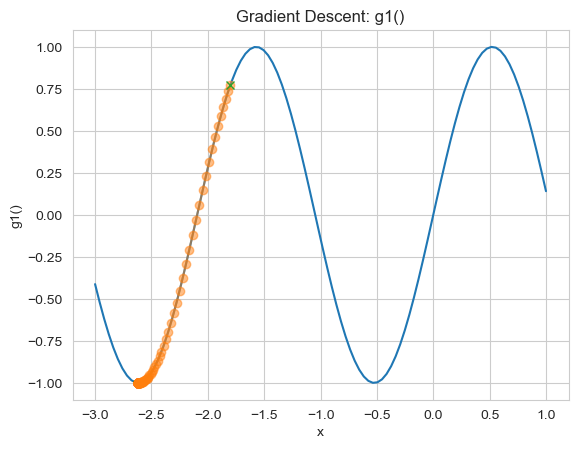

In [67]:
fun = g1
x = np.linspace(-3, 1, 100)
wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=-1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

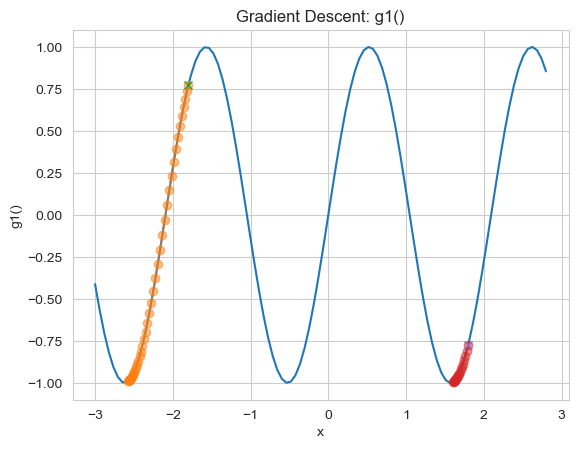

In [68]:
fun = g1
x = np.linspace(-3, 2.8, 100)
wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=40, w=-1.8)
wh2, ch2 = gradient_descent(fun, learning_rate=0.01, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.plot(wh2, ch2, marker='o', alpha=0.5)
plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

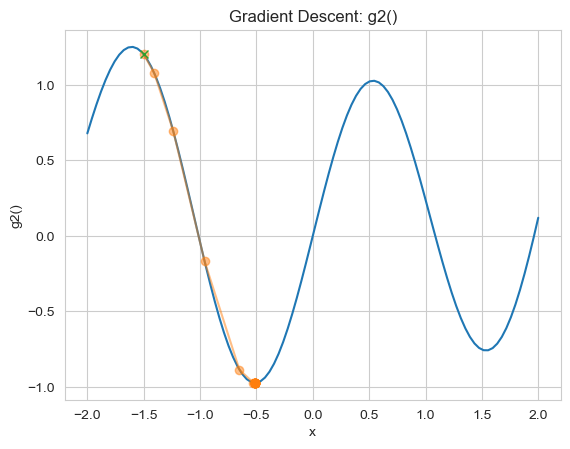

In [69]:
fun = g2
x = np.linspace(-2, 2, 100)
wh, ch = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

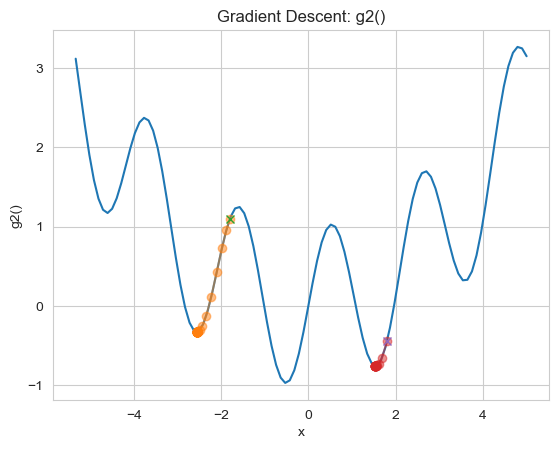

In [70]:
fun = g2
x = np.linspace(-5.33, 5, 100)
wh, ch = gradient_descent(fun, learning_rate=0.05, iteration_number=50, w=-1.8)
wh2, ch2 = gradient_descent(fun, learning_rate=0.05, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.plot(wh2, ch2, marker='o', alpha=0.5)
plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

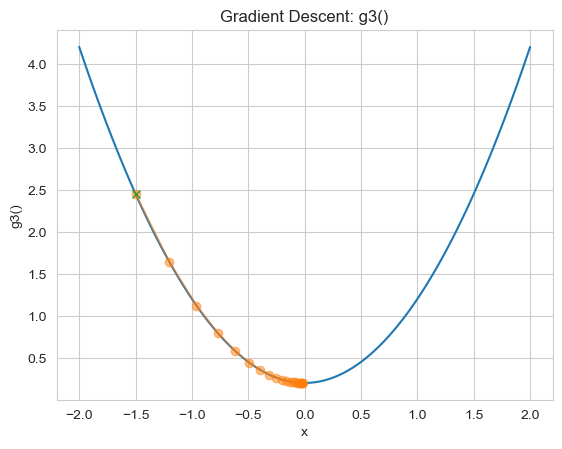

In [71]:
fun = g3
x = np.linspace(-2, 2, 100)
wh, ch = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

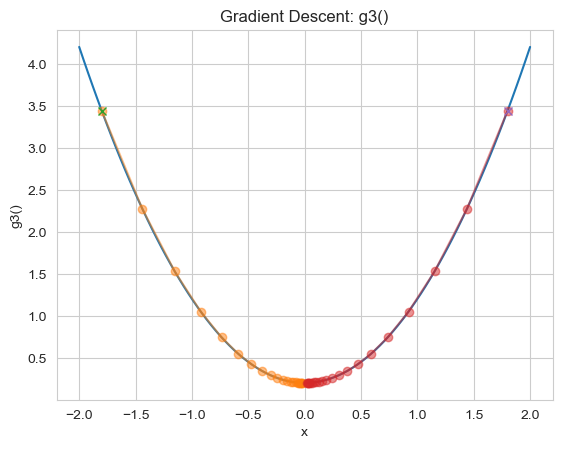

In [72]:
fun = g3
x = np.linspace(-2, 2, 100)
wh, ch = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=-1.8)
wh2, ch2 = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.plot(wh2, ch2, marker='o', alpha=0.5)
plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

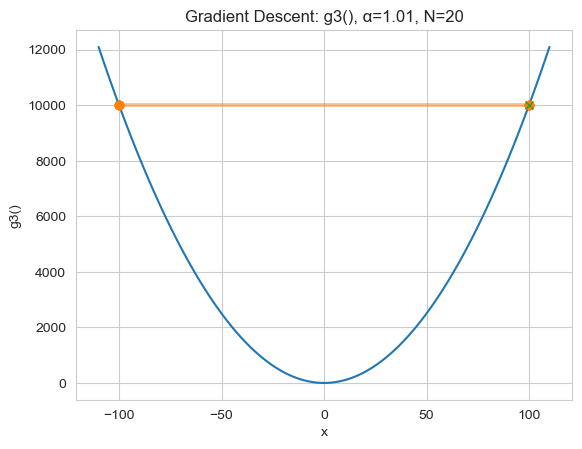

In [73]:
fun = g3
x = np.linspace(-110, 110, 100)
# x = np.linspace(-160, 160, 100)

wh, ch = gradient_descent(fun, learning_rate=1.00, iteration_number=20, w=100)
# wh2, ch2 = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
# plt.plot(wh2, ch2, marker='o', alpha=0.5)
# plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '(), α=1.01, N=20')
plt.show()

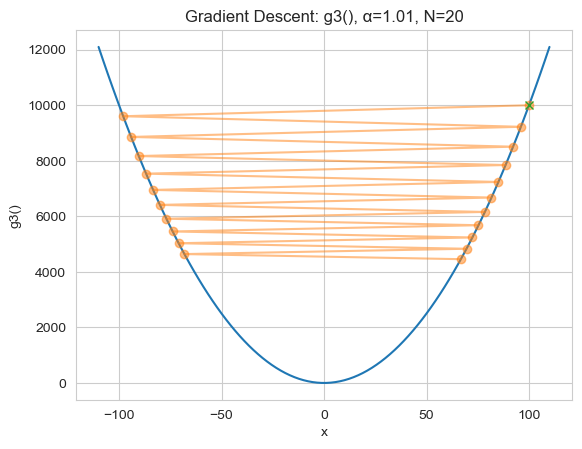

In [74]:
fun = g3
x = np.linspace(-110, 110, 100)
# x = np.linspace(-160, 160, 100)

wh, ch = gradient_descent(fun, learning_rate=0.99, iteration_number=20, w=100)
# wh2, ch2 = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
# plt.plot(wh2, ch2, marker='o', alpha=0.5)
# plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '(), α=1.01, N=20')
plt.show()

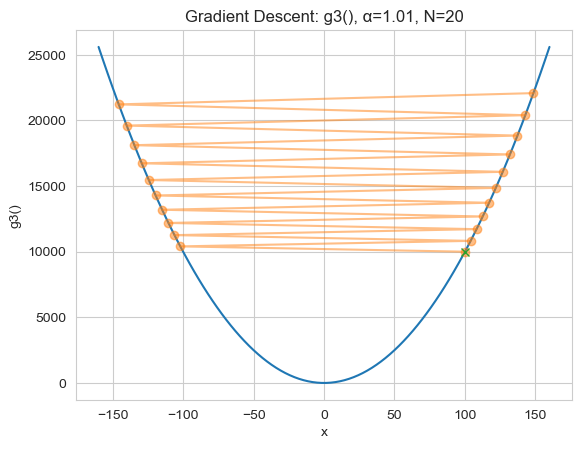

In [75]:
fun = g3
# x = np.linspace(-110, 110, 100)
x = np.linspace(-160, 160, 100)

wh, ch = gradient_descent(fun, learning_rate=1.01, iteration_number=20, w=100)
# wh2, ch2 = gradient_descent(fun, learning_rate=0.1, iteration_number=20, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
# plt.plot(wh2, ch2, marker='o', alpha=0.5)
# plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '(), α=1.01, N=20')
plt.show()

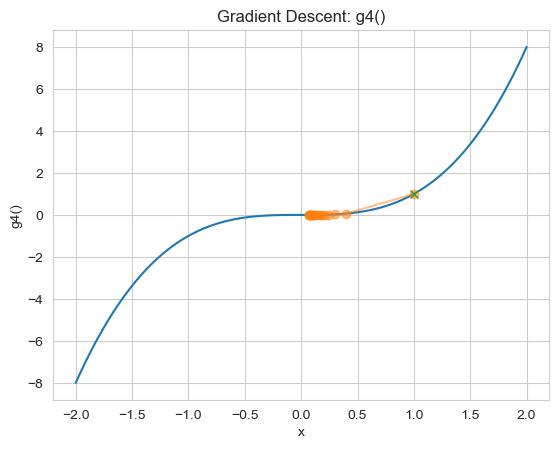

In [76]:
fun = g4
x = np.linspace(-2, 2, 100)
wh, ch = gradient_descent(fun, learning_rate=0.2, iteration_number=20, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

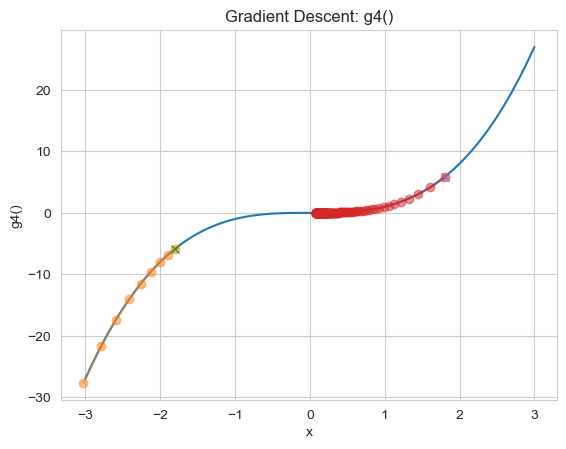

In [77]:
fun = g4
x = np.linspace(-3, 3, 100)
wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=8, w=-1.8)
wh2, ch2 = gradient_descent(fun, learning_rate=0.02, iteration_number=200, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.plot(wh2, ch2, marker='o', alpha=0.5)
plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

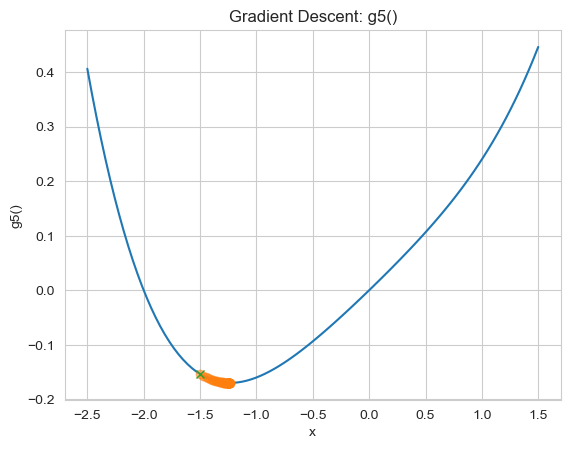

In [78]:
fun = g5
x = np.linspace(-2.5, 1.5, 100)
wh, ch = gradient_descent(fun, learning_rate=0.2, iteration_number=50, w=-1.5)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

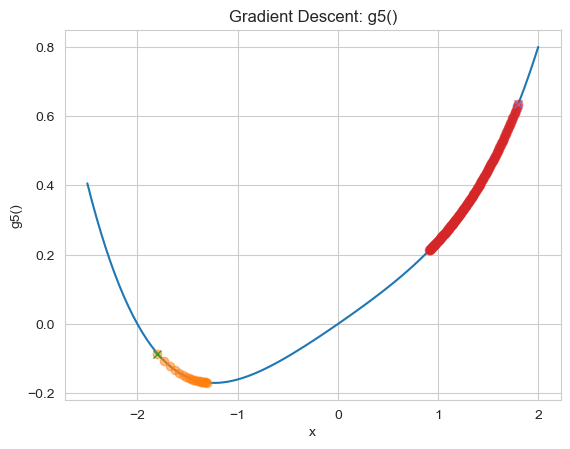

In [79]:
fun = g5
x = np.linspace(-2.5, 2.0, 100)
wh, ch = gradient_descent(fun, learning_rate=0.2, iteration_number=20, w=-1.8)
wh2, ch2 = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=1.8)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.plot(wh2, ch2, marker='o', alpha=0.5)
plt.plot(wh2[0], ch2[0], marker='x')

plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

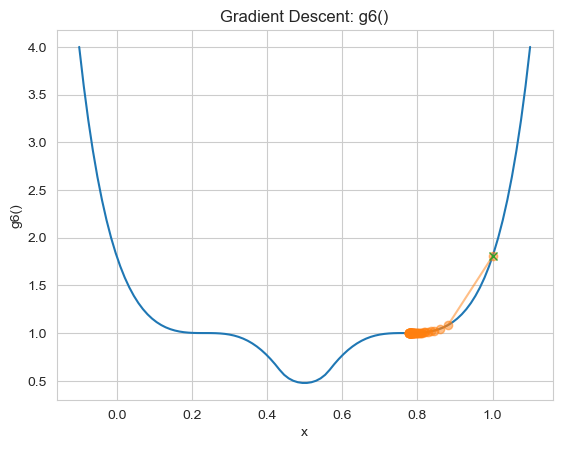

In [80]:
fun = g6
x = np.linspace(-0.1, 1.1, 100)
wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=50, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

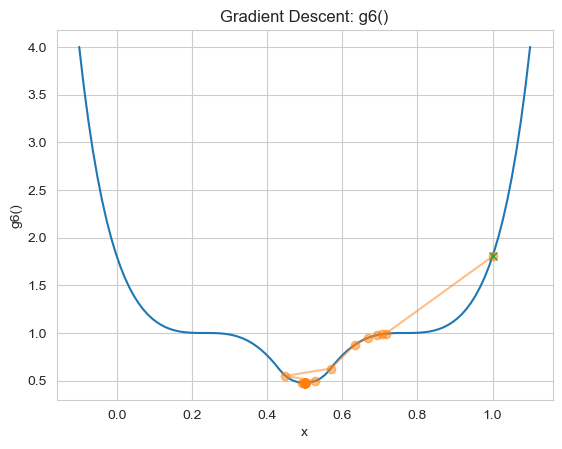

In [81]:
fun = g6
x = np.linspace(-0.1, 1.1, 100)
wh, ch = gradient_descent(fun, learning_rate=0.024, iteration_number=50, w=1.0)

plt.plot(x, fun(x))
plt.plot(wh, ch, marker='o', alpha=0.5)
plt.plot(wh[0], ch[0], marker='x')
plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

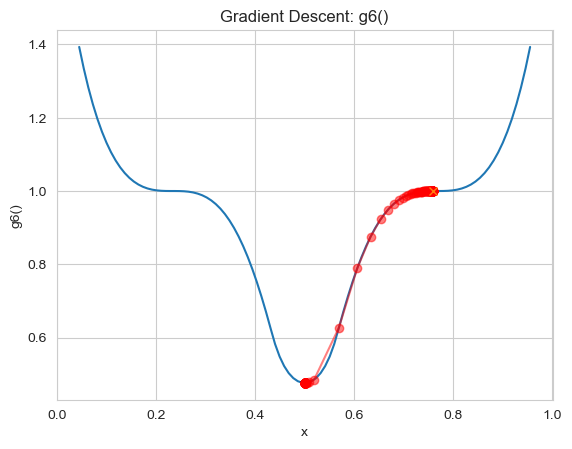

In [82]:
fun = g6
x = np.linspace(0.045, 0.955, 100)
# wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=0.77)
# wh2, ch2 = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=0.05)
# wh3, ch3 = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=0.3)
wh4, ch4 = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=0.76)

plt.plot(x, fun(x))
# plt.plot(wh, ch, marker='o', alpha=0.5)
# plt.plot(wh[0], ch[0], marker='x')
# plt.plot(wh2, ch2, marker='o', alpha=0.5)
# plt.plot(wh2[0], ch2[0], marker='x')
# plt.plot(wh3, ch3, marker='o', alpha=0.5)
# plt.plot(wh3[0], ch3[0], marker='x')
plt.plot(wh4, ch4, marker='o', alpha=0.5, color='red')
plt.plot(wh4[0], ch4[0], marker='x')


plt.xlabel('x')
plt.ylabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')
plt.show()

## Gradient Descent: 3D plots

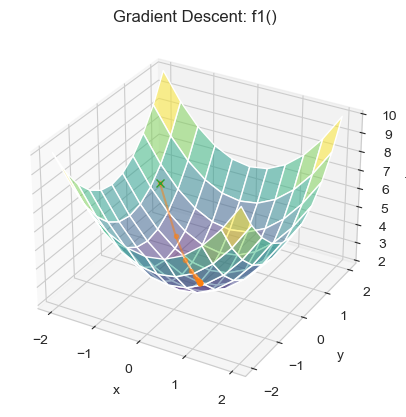

In [83]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
z = [fun(np.array([xi, yi])) for xi in x for yi in y]

wh, ch = gradient_descent(fun, learning_rate=0.2, iteration_number=20, w=np.array([-1.5, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='.', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

plt.show()

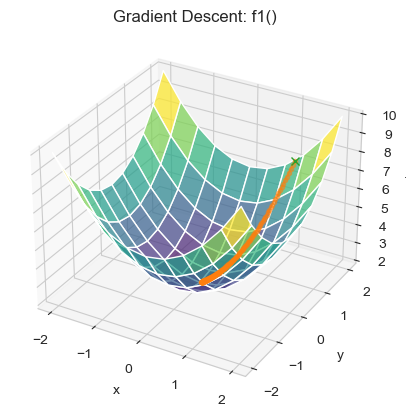

In [84]:
fun = f1

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
# z = [fun(np.array([xi, yi])) for xi in x for yi in y]
z = [fun(np.array([xi, yi])) for yi in y for xi in x ]

wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=np.array([1.0, 2.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.7, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
wh_x_mesh, wh_y_mesh = np.meshgrid(wh_x, wh_y)
ax.plot(wh_x, wh_y, ch, marker='.', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

plt.show()

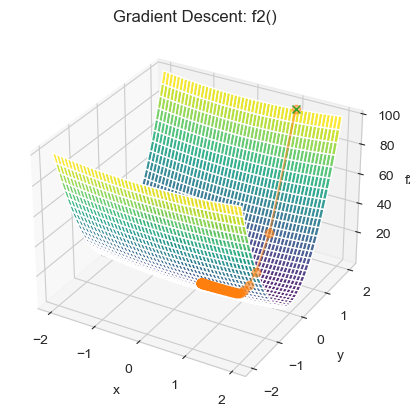

In [85]:
fun = f2

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
# z = [fun(np.array([xi, yi])) for xi in x for yi in y]
z = [fun(np.array([xi, yi]))  for yi in y for xi in x]

wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=200, w=np.array([1.0, 2.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.9, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

# ax.view_init(30, 0)
plt.show()

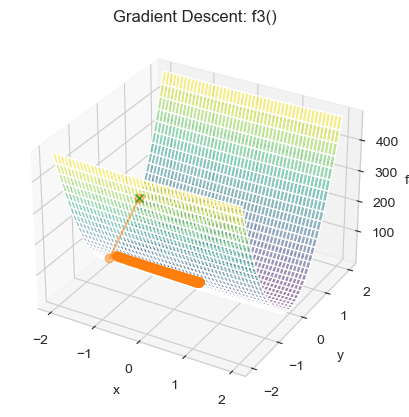

In [86]:
fun = f3

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for yi in y for xi in x ]

wh, ch = gradient_descent(fun, learning_rate=0.005, iteration_number=500, w=np.array([-2.0, 1.0]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

plt.show()

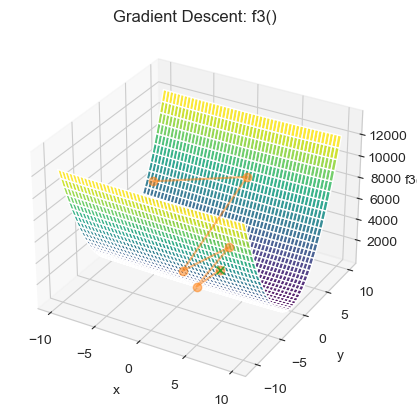

In [87]:
fun = f3

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
z = [fun(np.array([xi, yi])) for yi in y for xi in x ]

wh, ch = gradient_descent(fun, learning_rate=0.01, iteration_number=5, w=np.array([1.0, 2.0]))

# print(f'wh: {wh}')
# print(f'ch: {ch}')

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.9, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

# print(wh_x)
# print(wh_y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

plt.show()

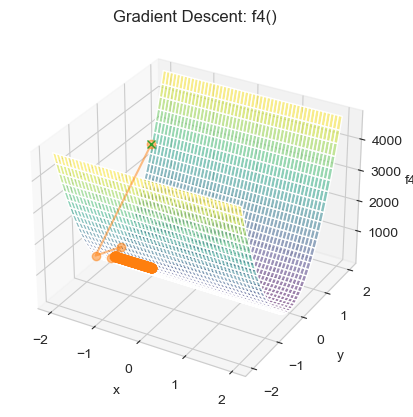

In [88]:
fun = f4

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = [fun(np.array([xi, yi])) for yi in y for xi in x ]

wh, ch = gradient_descent(fun, learning_rate=0.0006, iteration_number=500, w=np.array([-2.0, 1.5]))

# plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_mesh, y_mesh = np.meshgrid(x, y)
z_array = np.array(z).reshape(len(x),len(y))
ax.plot_surface(x_mesh, y_mesh, z_array, alpha=0.5, cmap='viridis')

# plot weights and cost from optimization function
wh_x = np.array([wh_xi[0] for wh_xi in wh])
wh_y = np.array([wh_yi[1] for wh_yi in wh])
ax.plot(wh_x, wh_y, ch, marker='o', alpha=0.5)
plt.plot(wh_x[0], wh_y[0], ch[0], marker='x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(fun.__name__ + '()')
plt.title('Gradient Descent: ' + fun.__name__ + '()')

plt.show()